In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_csv("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques/test.csv")

In [3]:
pd.set_option('display.max_columns', 500)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
nan_values=pd.DataFrame(columns=df_train.isna().sum().index)
nan_values.loc[0] = df_train.isna().sum().values
nan_values

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,0,81,81,0,0,0,0,0,0,0,1453,1179,1406,0,0,0,0,0,0


In [5]:
# We consider that houses with 'Alley' as NaN do not have alley access (door right on the street)
df_train["Alley"][df_train["Alley"].isna()] = 'No Alley'

# Houses with NaN for MasVnrType and MasVnrArea have no Masonry
df_train["MasVnrType"][df_train["MasVnrType"].isna()] = 'No Masonry'
df_train["MasVnrArea"][df_train["MasVnrArea"].isna()] = 0

# Houses with NaN for Basement have no basement
(df_train['BsmtQual'])[df_train['BsmtQual'].isna()] = 'No Basement'
(df_train['BsmtCond'])[df_train['BsmtCond'].isna()] = 'No Basement'
(df_train['BsmtFinType1'])[df_train['BsmtFinType1'].isna()] = 'No Basement'
(df_train['BsmtExposure'])[df_train['BsmtQual']=='No Basement'] = 'No Basement'
(df_train['BsmtFinType2'])[df_train['BsmtQual']=='No Basement'] = 'No Basement'

# Houses with NaN for Garage have no garage
(df_train['GarageType'])[df_train['GarageType'].isna()] = 'No Garage'
(df_train['GarageFinish'])[df_train['GarageFinish'].isna()] = 'No Garage'
(df_train['GarageYrBlt'])[df_train['GarageYrBlt'].isna()] = -1
(df_train['GarageQual'])[df_train['GarageQual'].isna()] = 'No Garage'
(df_train['GarageCond'])[df_train['GarageCond'].isna()] = 'No Garage'

# Houses with NaN for Pool Quality have pool area equal to 0. Meaning there is no pool
(df_train['PoolQC'])[df_train['PoolQC'].isna()] = 'No Pool'

# Houses with NaN for Fence have no fence
(df_train['Fence'])[df_train['Fence'].isna()] = 'No Fence'

# Houses with NaN for Fireplace Quality have 0 in Fire Place. So there is no fireplace
(df_train['FireplaceQu'])[df_train['FireplaceQu'].isna()] = 'No Fireplace'

#Some rows with still missing data are removed (represent 3 rows)
df_train = df_train.drop(df_train[df_train['Electrical'].isna()].index, axis=0)
df_train = df_train.drop(df_train[df_train['BsmtExposure'].isna()].index, axis=0)
df_train = df_train.drop(df_train[df_train['BsmtFinType2'].isna()].index, axis=0)

/Users/victor_03/opt/anaconda3/envs/Tenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/victor_03/opt/anaconda3/envs/Tenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/victor_03/opt/anaconda3/envs/Tenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/victor

#### Analysis of the feature 'Miscellaneous features'

Text(0, 0.5, 'SalePrice')

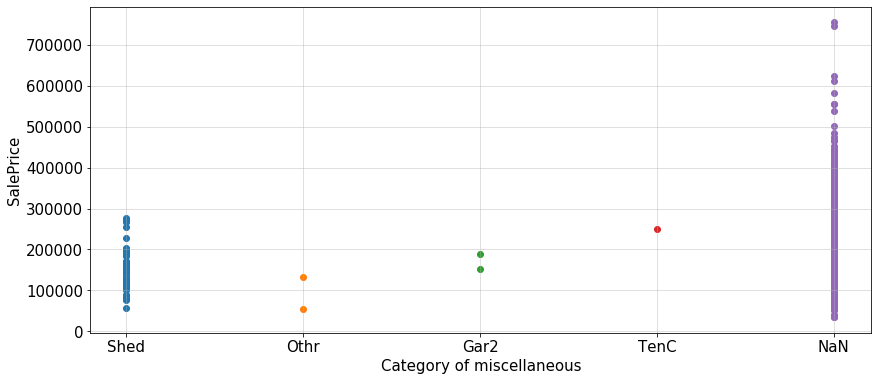

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.scatter(np.linspace(1, 1, len((df_train['SalePrice'])[df_train['MiscFeature']=='Shed'].values)), (df_train['SalePrice'])[df_train['MiscFeature']=='Shed'].values)
plt.scatter(np.linspace(2, 2, len((df_train['SalePrice'])[df_train['MiscFeature']=='Othr'].values)), (df_train['SalePrice'])[df_train['MiscFeature']=='Othr'].values)
plt.scatter(np.linspace(3, 3, len((df_train['SalePrice'])[df_train['MiscFeature']=='Gar2'].values)), (df_train['SalePrice'])[df_train['MiscFeature']=='Gar2'].values)
plt.scatter(np.linspace(4, 4, len((df_train['SalePrice'])[df_train['MiscFeature']=='TenC'].values)), (df_train['SalePrice'])[df_train['MiscFeature']=='TenC'].values)
plt.scatter(np.linspace(5, 5, len((df_train['SalePrice'])[df_train['MiscFeature'].isna()].values)), (df_train['SalePrice'])[df_train['MiscFeature'].isna()].values)
plt.grid(alpha=.5)
x=np.array([1, 2, 3, 4, 5])
my_xticks = ['Shed', 'Othr', 'Gar2', 'TenC', 'NaN']
plt.xticks(x, my_xticks)
plt.gca().xaxis.set_tick_params(labelsize = 15)
plt.gca().yaxis.set_tick_params(labelsize = 15)
plt.xlabel('Category of miscellaneous', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)

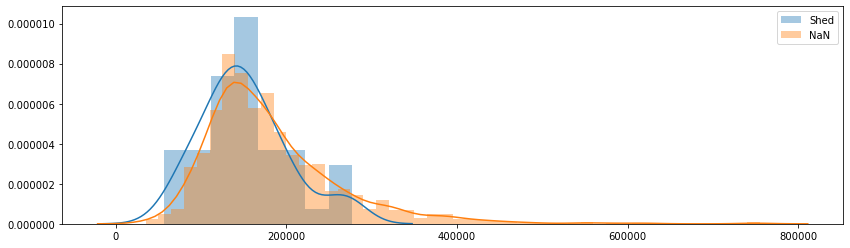

In [7]:
fig, ax = plt.subplots(figsize=(14, 4))
sns.distplot((df_train['SalePrice'])[df_train['MiscFeature']=='Shed'].values, label='Shed')
sns.distplot((df_train['SalePrice'])[df_train['MiscFeature'].isna()].values, label='NaN')
plt.legend()

As we can see, the miscellaneous features do not have a high influence. For categories 'Othr', 'Gar2' and 'TenC', there are just a few
items. For 'Shed', the distribution of the prices is similar to the other data. 
So we can remove this feature.

In [8]:
df_train = df_train.drop(['MiscFeature'], axis=1)

In [9]:
nan_values=pd.DataFrame(columns=df_train.isna().sum().index)
nan_values.loc[0] = df_train.isna().sum().values
nan_values

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,0,259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Only some size of area are missing. These will be predicted from other features one the data is cleansed.

In [10]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,0,12,2008,WD,Normal,250000


In [11]:
df_train['YearBuilt'] = 2020 - df_train['YearBuilt']
df_train['YearRemodAdd'] = 2020 - df_train['YearRemodAdd']
df_train['YrSold'] = 2020 - df_train['YrSold']

### Encoding of the features: 
standard transformation for numerical features
categorization for text features

In [12]:
for feature in df_train.columns:
    if type(df_train[feature][0])==str:
        le=LabelEncoder()
        le.fit(df_train[feature].unique())
        df_train[feature] = le.transform(df_train[feature].values)
        df_train[feature] = df_train[feature].astype('category')
    elif type(df_train[feature][0])==np.int64 or type(df_train[feature][0])==np.float64:
        scaler = StandardScaler()
        scaler.fit(df_train[feature].values.reshape(len(df_train[feature]), 1))
        df_train[feature]=scaler.transform(df_train[feature].values.reshape(len(df_train[feature]), 1))

In [13]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730416,0.073153,3,-0.207371,-0.206742,1,1,3,3,0,4,0,5,2,2,0,5,0.652313,-0.517875,-1.053374,-0.880521,1,1,12,13,1,0.514339,2,4,2,2,4,3,2,0.575335,6,-0.287639,-0.943786,-0.460907,1,0,1,4,-0.793712,1.162287,-0.120367,0.370326,1.107282,-0.241324,0.791061,1.228999,0.163952,-0.211681,2,0.911965,6,-0.950607,3,1,0.296336,2,0.313277,0.352166,5,5,2,-0.751801,0.215940,-0.359742,-0.116461,-0.270507,-0.068763,3,4,-0.087779,-1.600516,-0.138531,8,4,0.347997
1,-1.728043,-0.872157,3,0.409898,-0.091600,1,1,3,3,0,2,0,24,1,2,0,2,-0.070990,2.176923,-0.158969,0.427591,1,1,8,8,3,-0.569964,3,4,1,2,4,1,0,1.172131,6,-0.287639,-0.640072,0.472399,1,0,1,4,0.256833,-0.794298,-0.120367,-0.481743,-0.820209,3.944490,0.791061,-0.760614,0.163952,-0.211681,3,-0.317774,6,0.600383,5,1,0.236890,2,0.313277,-0.059670,5,5,2,1.624715,-0.704588,-0.359742,-0.116461,-0.270507,-0.068763,3,4,-0.087779,-0.489887,0.614604,8,4,0.008160
2,-1.725670,0.073153,3,-0.083917,0.073603,1,1,0,3,0,4,0,5,2,2,0,5,0.652313,-0.517875,-0.987121,-0.832072,1,1,12,13,1,0.326245,2,4,2,2,4,2,2,0.092631,6,-0.287639,-0.300093,-0.313785,1,0,1,4,-0.628108,1.189780,-0.120367,0.514874,1.107282,-0.241324,0.791061,1.228999,0.163952,-0.211681,2,-0.317774,6,0.600383,5,1,0.291932,2,0.313277,0.632964,5,5,2,-0.751801,-0.070782,-0.359742,-0.116461,-0.270507,-0.068763,3,4,-0.087779,0.990953,-0.138531,8,4,0.536796
3,-1.723296,0.309480,3,-0.413127,-0.096607,1,1,0,3,0,0,0,6,2,2,0,5,0.652313,-0.517875,1.861723,0.718283,1,1,13,15,3,-0.569964,3,4,0,4,1,3,0,-0.499777,6,-0.287639,-0.059841,-0.690785,1,2,1,4,-0.522019,0.937761,-0.120367,0.383640,1.107282,-0.241324,-1.024019,-0.760614,0.163952,-0.211681,2,0.297096,6,0.600383,2,5,0.285327,3,1.651823,0.792083,5,5,2,-0.751801,-0.176416,4.088121,-0.116461,-0.270507,-0.068763,3,4,-0.087779,-1.600516,1.367738,8,0,-0.514183
4,-1.720923,0.073153,3,0.574503,0.374975,1,1,0,3,0,2,0,15,2,2,0,5,1.375615,-0.517875,-0.953995,-0.735175,1,1,12,13,1,1.366290,2,4,2,2,4,0,2,0.463435,6,-0.287639,-0.173167,0.203442,1,0,1,4,-0.045910,1.618213,-0.120367,1.298474,1.107282,-0.241324,0.791061,1.228999,1.388969,-0.211681,2,1.526835,6,0.600383,5,1,0.289730,2,1.651823,1.699995,5,5,2,0.779377,0.563024,-0.359742,-0.116461,-0.270507,-0.068763,3,4,-0.087779,2.101583,-0.138531,8,4,0.870340


### Prediction of LotFrontage for missing data using RF with 100 estimators

In [55]:
df_frontage = df_train[df_train['LotFrontage'].notnull()]
y_frontage = np.array(df_frontage['LotFrontage'].values)
df_frontage = df_frontage.drop(['SalePrice', 'LotFrontage'], axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_frontage, y_frontage, random_state=42, test_size=.3)

In [57]:
clf = RandomForestRegressor(max_depth=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [58]:
prediction = clf.predict(X_test)

In [59]:
mean_squared_error(y_test, prediction)

0.4595104930557434

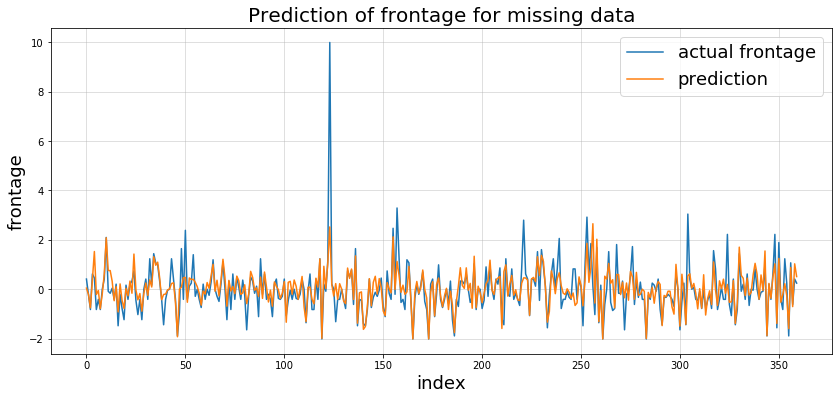

In [60]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(y_test, label='actual frontage')
plt.plot(prediction, label='prediction')
plt.xlabel('index', fontsize=18)
plt.ylabel('frontage', fontsize=18)
plt.title('Prediction of frontage for missing data', fontsize = 20)
plt.grid(alpha=.5)
plt.legend(fontsize=18)

In [61]:
frontage_prediction = clf.predict((df_train[df_train['LotFrontage'].isnull()]).drop(['SalePrice', 'LotFrontage'], axis=1))

In [64]:
(df_train['LotFrontage'])[df_train['LotFrontage'].isnull()] = frontage_prediction

/Users/victor_03/opt/anaconda3/envs/Tenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
sum(df_train.isna().sum().values)

0

No more missing data

In [ ]:
df_train.to_csv("/Users/victor_03/Documents/DataScience/Kaggle/house-prices-advanced-regression-techniques")